In [49]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [50]:
SEED=11

In [51]:
def callback(**kwargs):
    stats.append(kwargs)
    if 'fitness' in kwargs:
        return not((int)(kwargs['fitness'])==0)
    elif 'done' in kwargs:
        return not(kwargs['done'])
    else:
        return True

In [53]:
input_sizes=[5,10,20]

# Randomized Hill Climbing

In [94]:
problem = mlrose.QueensGenerator().generate(seed=SEED, size=20)
problem.find_neighbors()
len(problem.neighbors)

380

==========Input Size 5=================
[2 0 3 1 4] 0.0
Number of Iterations: 5
Number of Fitness Evaluations: 6
Average Fitness Evaluations per Iteration: 1.200
Wall Clock Time: 0.003436
==========Input Size 10=================
[0 8 4 9 7 3 1 6 2 5] 0.0
Number of Iterations: 2211
Number of Fitness Evaluations: 2283
Average Fitness Evaluations per Iteration: 1.033
Wall Clock Time: 0.20404
==========Input Size 20=================
[ 2 13 16  4  9 15 10 18  0  3  5  8 11 16 12  6  1  7 14 19] 1.0
Number of Iterations: 23612
Number of Fitness Evaluations: 24701
Average Fitness Evaluations per Iteration: 1.046
Wall Clock Time: 3.670421


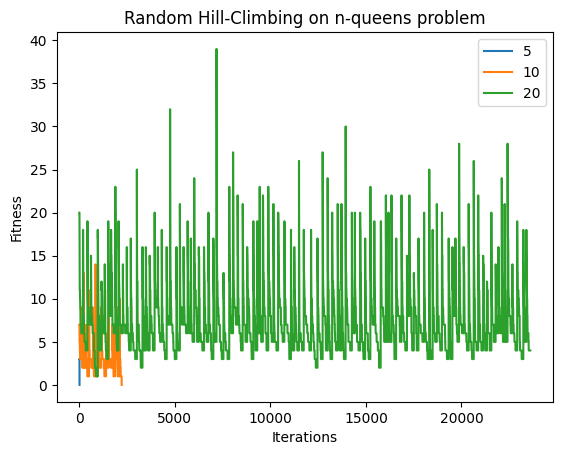

In [74]:
rhc_results=dict()
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.random_hill_climb(problem,
                                                       random_state=SEED,
                                                        restarts=100,
                                                        max_attempts=90,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    rhc_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Random Hill-Climbing on n-queens problem")
plt.legend(loc='best')

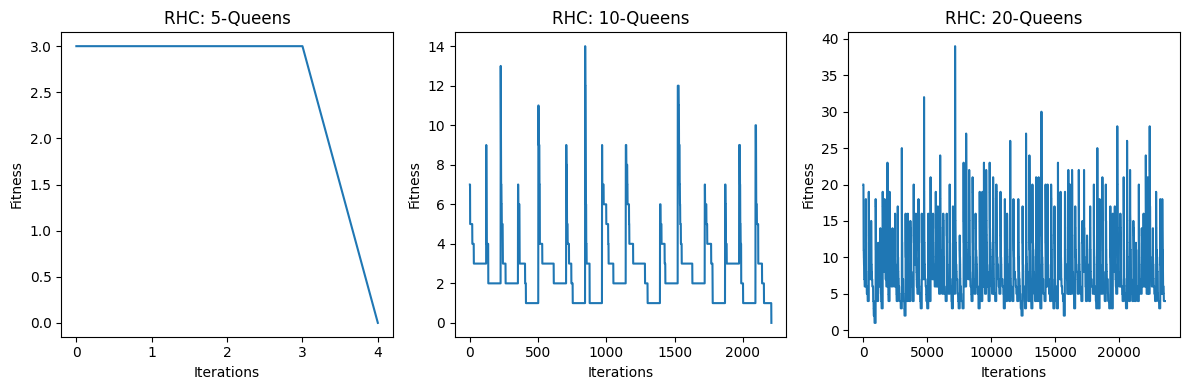

In [104]:

fig,axs=plt.subplots(1,3,figsize=(12,4))
for i,ax in zip(input_sizes,axs):
    ax.set_title(f"RHC: {i}-Queens")
    ax.plot(rhc_results[i]['fitness_curve'])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")

plt.tight_layout()

# Simulated Annealing

In [56]:
problem = mlrose.QueensGenerator().generate(seed=SEED, size=10)
temperature=[10,100,500,1000]*5
decay=[0.1,0.5,0.8,0.9,0.99,0.999]
temperature_list=[mlrose.GeomDecay(init_temp=t, decay=d) for t in temperature for d in decay]
sa = mlrose.SARunner(problem=problem,
              experiment_name='sa',
              output_directory=None,
              seed=None,
              iteration_list=[10000],
              max_attempts=90,
              temperature_list=temperature_list)

# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()
df_run_stats['init_temp']=df_run_stats['Temperature'].apply(lambda x: x.init_temp)
df_run_stats['decay']=df_run_stats['Temperature'].apply(lambda x: x.decay)


best_fitness = df_run_stats['Fitness'].min()

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['init_temp','decay']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

,,Fitness,FEvals,Time
init_temp,decay,,,
100,0.100,0.4,395.0,0.099013
1000,0.800,0.4,630.8,0.151647
500,0.100,0.4,660.0,0.148886
1000,0.500,0.4,1111.6,0.318295
100,0.990,0.4,1490.4,0.261751
500,0.999,0.4,13409.4,5.295136
100,0.800,0.6,379.8,0.095590
500,0.500,0.6,420.4,0.108290
10,0.800,0.6,464.2,0.113723


==========Input Size 5=================
[0 3 1 4 2] 0.0
Number of Iterations: 130
Number of Fitness Evaluations: 258
Average Fitness Evaluations per Iteration: 1.985
Wall Clock Time: 0.029357
==========Input Size 10=================
[2 9 6 3 0 4 1 8 5 7] 0.0
Number of Iterations: 9552
Number of Fitness Evaluations: 16425
Average Fitness Evaluations per Iteration: 1.720
Wall Clock Time: 1.287887
==========Input Size 20=================
[11  6  4 19 14 18 13  5  1  8 16  2 12 17 15 12  0  3  7  9] 1.0
Number of Iterations: 9356
Number of Fitness Evaluations: 16215
Average Fitness Evaluations per Iteration: 1.733
Wall Clock Time: 2.350771


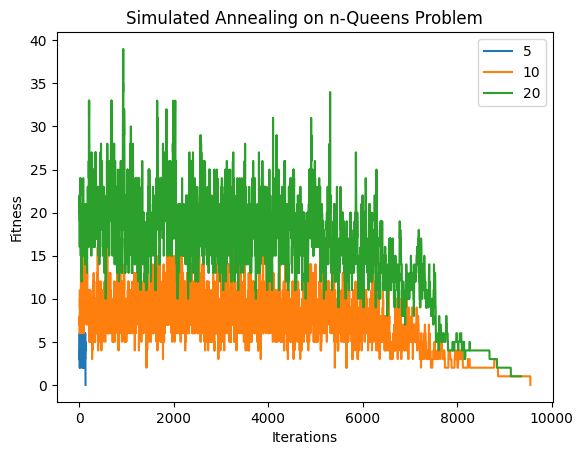

In [60]:
sa_results=dict()
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.simulated_annealing(problem,
              schedule=mlrose.GeomDecay(init_temp=1000, decay=0.999, min_temp=0.001),
               max_attempts=90,
               random_state=SEED,
               state_fitness_callback=callback,callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    sa_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Simulated Annealing on n-Queens Problem")
plt.legend(loc='best')

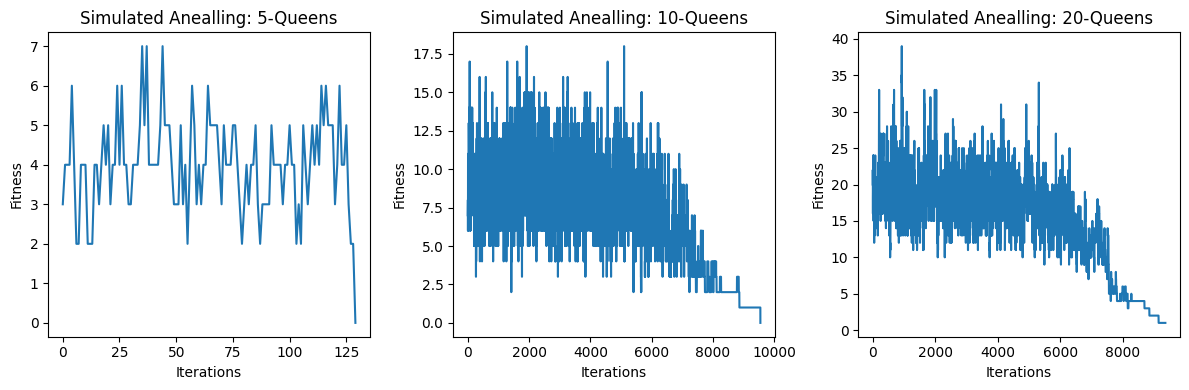

In [106]:

fig,axs=plt.subplots(1,3,figsize=(12,4))
for i,ax in zip(input_sizes,axs):
    ax.set_title(f"Simulated Anealling: {i}-Queens")
    ax.plot(sa_results[i]['fitness_curve'])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")

plt.tight_layout()

# Genetic

In [118]:
input_size=10
problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)
ga=mlrose.GARunner(problem=problem,
                  experiment_name="ga",
                  output_directory=None,
                  seed=None,
                  iteration_list=[50000],
                  max_attempts=100,
                  population_sizes=[50,100,200]*5,
                  mutation_rates=np.arange(0.1,1,0.1))

df_run_stats, df_run_curves = ga.run()
best_fitness = df_run_stats['Fitness'].min()
#df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Mutation Rate','State']).agg({'Iteration':'min','Time':'min','FEvals':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Mutation Rate']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness   FEvals      Time
Population Size Mutation Rate                            
200             0.6                0.2  14676.6  1.314579
                0.9                0.2  18656.2  1.680577
50              0.6                0.4   3838.8  0.341480
100             0.5                0.4   6891.4  0.617107
50              0.5                0.6   4481.6  0.400982
                0.3                0.6   4603.4  0.409821
                0.9                0.6   5531.8  0.497780
100             0.4                0.6   8325.8  0.740466
                0.2                0.6   8548.0  0.753063
                0.1                0.6   8689.2  0.764757
                0.7                0.6   9699.4  0.862552
                0.9                0.6  10830.0  0.972215
200             0.5                0.6  16726.2  1.490726
                0.8                0.6  17368.8  1.559343
                0.4                0.6  17610.2  1.571185
                0.7                0.6  20745.6  1.863107
50              0.7                0.8   5786.4  0.515569
                0.8                0.8   6429.6  0.575046
100             0.3                0.8  10082.4  0.894667
                0.8                0.8  11436.0  1.024130
                0.6                0.8  12547.2  1.116108
200             0.2                0.8  20142.6  1.804111
                0.1                0.8  21952.2  1.947206
50              0.2                1.0   6051.6  0.534159
200             0.3                1.0  24846.2  2.210408
50              0.4                1.2   6102.2  0.543580
                0.1                1.2   6735.2  0.597760

==========Input Size 5=================
[0 2 4 1 3] 0.0
Number of Iterations: 3
Number of Fitness Evaluations: 304
Average Fitness Evaluations per Iteration: 101.333
Wall Clock Time: 0.039902
==========Input Size 10=================
[9 6 3 0 7 1 8 5 2 4] 0.0
Number of Iterations: 17
Number of Fitness Evaluations: 1720
Average Fitness Evaluations per Iteration: 101.176
Wall Clock Time: 0.160057
==========Input Size 20=================
[18 10  8  5 17 12  0  2 16  7  3 11 15  1 19  4 13  9 14  6] 0.0
Number of Iterations: 165
Number of Fitness Evaluations: 16674
Average Fitness Evaluations per Iteration: 101.055
Wall Clock Time: 2.594988


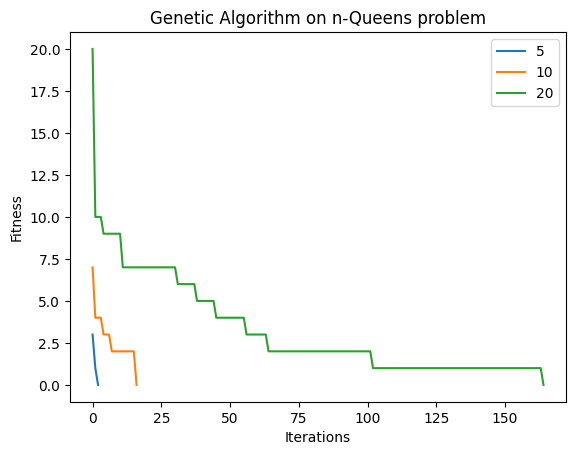

In [121]:
ga_results=dict()
for input_size in input_sizes:
    fitness=mlrose.fitness.queens.Queens()
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.genetic_alg(problem,
                                                             pop_size=100,
                                                             mutation_prob=0.9,
                                                            random_state=SEED,
                                                             max_attempts=100,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    ga_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Genetic Algorithm on n-Queens problem")
plt.legend(loc='best')

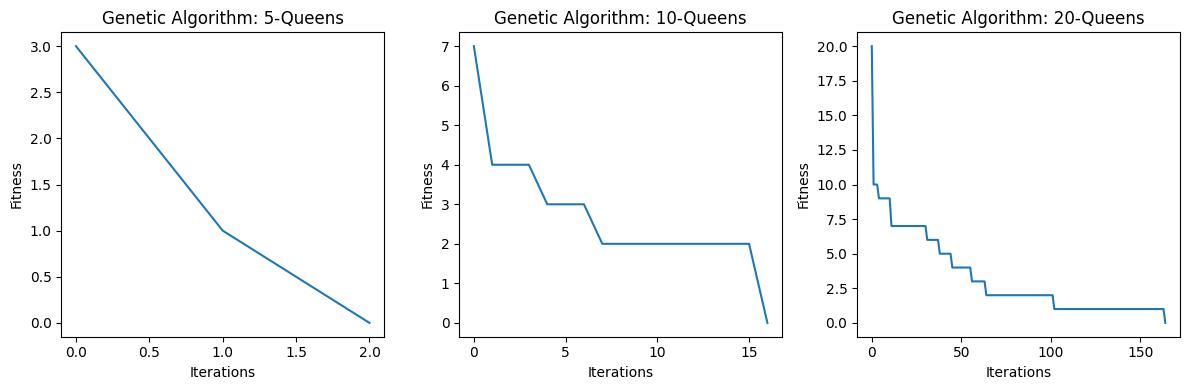

In [113]:
fig,axs=plt.subplots(1,3,figsize=(12,4))
for i,ax in zip(input_sizes,axs):
    ax.set_title(f"Genetic Algorithm: {i}-Queens")
    ax.plot(ga_results[i]['fitness_curve'])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")

plt.tight_layout()

# MIMIC

In [12]:
problem = mlrose.QueensGenerator().generate(seed=SEED, size=10)  
mmc = mlrose.MIMICRunner(problem=problem,
                          experiment_name="mimic", 
                          seed=None,
                          iteration_list=[1000], 
                          population_sizes=[500]*5,
                          keep_percent_list=np.arange(0.1,1,0.1), 
                          max_attempts=100, generate_curves=False, use_fast_mimic=True)

df_run_stats, df_run_curves = mmc.run()
best_fitness = df_run_stats['Fitness'].min()
df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Keep Percent','State']).agg({'Iteration':'min','FEvals':'min','Time':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Keep Percent']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness   FEvals      Time
Population Size Keep Percent                            
500             0.3               1.0  44791.2  4.356531
                0.5               1.2  44390.4  4.320224
                0.4               1.2  44991.6  4.353747
                0.1               1.2  52105.2  5.056024
                0.6               1.2  55613.4  5.425467
                0.7               1.2  55713.4  5.460938
                0.2               1.4  53308.0  5.178556
                0.8               1.4  63428.8  6.226353
                0.9               1.8  54310.0  5.344281

==========Input Size 5=================
[0 2 4 1 3] 0.0
Number of Iterations: 2
Number of Fitness Evaluations: 20002
Average Fitness Evaluations per Iteration: 10001.000
Wall Clock Time: 0.877349
==========Input Size 10=================
[6 4 1 5 0 9 7 2 8 3] 0.0
Number of Iterations: 10
Number of Fitness Evaluations: 100012
Average Fitness Evaluations per Iteration: 10001.200
Wall Clock Time: 7.750059
==========Input Size 20=================
[18  5  9  1 18  0 14 17  7 10  4  2 15 19 14 11 13  6  3 12] 2.0
Number of Iterations: 120
Number of Fitness Evaluations: 1200127
Average Fitness Evaluations per Iteration: 10001.058
Wall Clock Time: 187.713928


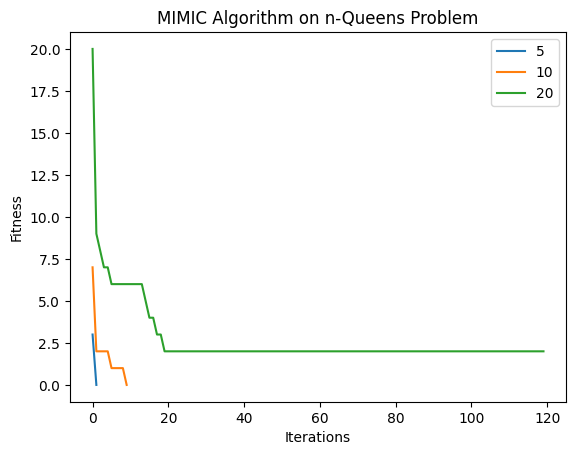

In [115]:
mimic_results=dict()
for input_size in input_sizes:
    problem = mlrose.QueensGenerator().generate(seed=SEED, size=input_size)  
    problem.reset()
    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.mimic(problem,
                                                       pop_size=10000,
                                                       keep_pct=0.1,
                                                       max_attempts=100,
                                                       random_state=SEED,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    mimic_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"MIMIC Algorithm on n-Queens Problem")
plt.legend(loc='best')

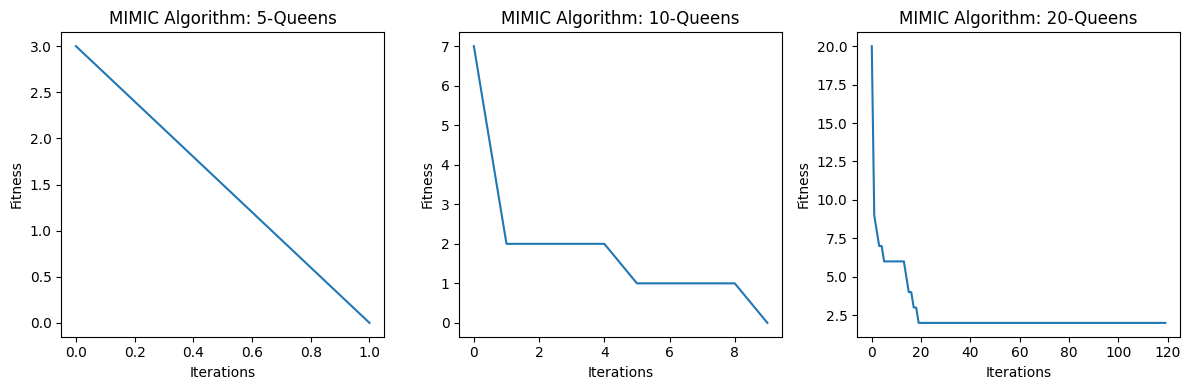

In [122]:
fig,axs=plt.subplots(1,3,figsize=(12,4))
for i,ax in zip(input_sizes,axs):
    ax.set_title(f"MIMIC Algorithm: {i}-Queens")
    ax.plot(mimic_results[i]['fitness_curve'])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")

plt.tight_layout()

# Comparison

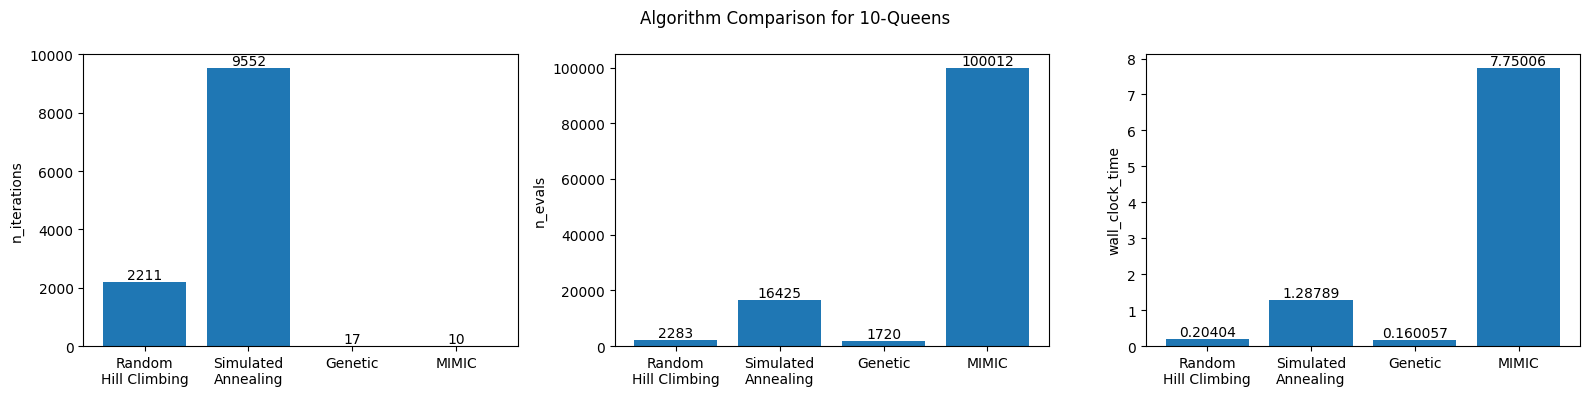

In [152]:
input_size=10
x=['Random\nHill Climbing','Simulated\nAnnealing','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
plots=['n_iterations','n_evals','wall_clock_time']
fig,axs=plt.subplots(1,3,figsize=(16,4))
best_fitness=min([alg[input_size]['best_fitness'] for alg in y])

for p,ax in zip(plots,axs):
    bars=[]
    bars.append(ax.bar(x,[alg[input_size][p] for alg in y]))
    for bar in bars:
        for b,alg in zip(bar,y):
            if alg[input_size]['best_fitness']!=best_fitness:
                b.set(hatch='/')
        ax.bar_label(bar)
                
    ax.set_ylabel(p)
plt.suptitle("Algorithm Comparison for 10-Queens")
plt.tight_layout()

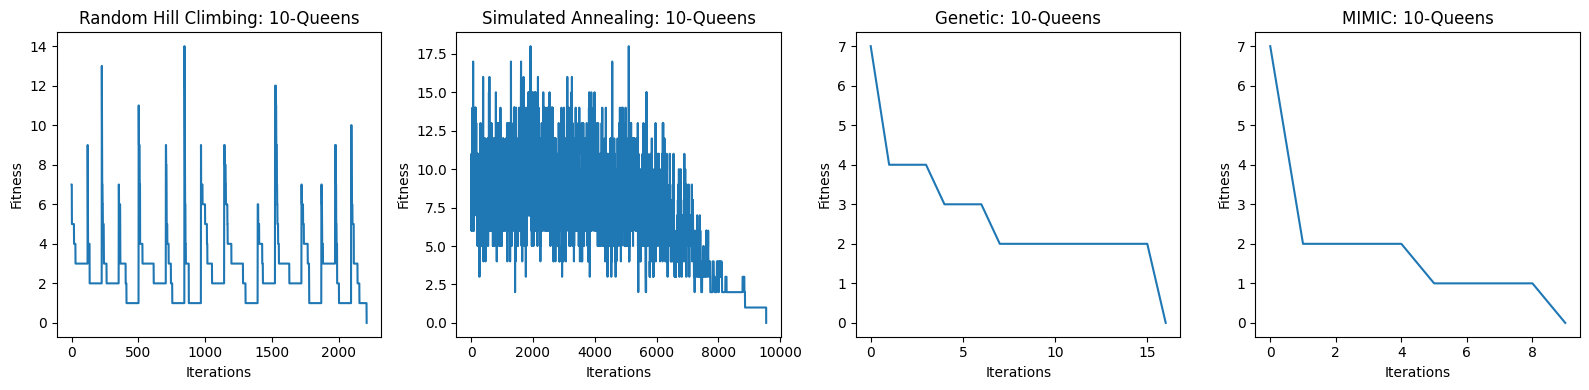

In [129]:
i=10
fig,axs=plt.subplots(1,4,figsize=(16,4))
x=['Random Hill Climbing','Simulated Annealing','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
for alg,results,ax in zip(x,y,axs):
    ax.set_title(f"{alg}: {i}-Queens")
    ax.plot(results[i]['fitness_curve'])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
plt.tight_layout()